## Commutation relations

$$\begin{align}
a(\nu) &= -\frac{\sqrt{2\kappa}}{m^\prime(\nu)}\left[d_+(\nu)a_{in}(\nu)+\epsilon a^\dagger_{in}(-\nu)\right]\\
a^\dagger(-\nu) &= -\frac{\sqrt{2\kappa}}{m^\prime(\nu)}\left[d_-(\nu)a^\dagger_{in}(-\nu)+\epsilon^* a_{in}(\nu)\right]\\
\left[a_{in}(\nu),a^\dagger_{in}(-\nu^\prime)\right]&=\left(1+\frac{k}{\kappa}\cos{(\phi+\nu\tau)}\right)\delta\left(\nu+\nu^\prime\right)\\
\left[a(\nu),a^\dagger(-\nu^\prime)\right]&=2\frac{\left|d_+(\nu)\right|^2-|\epsilon|^2}{\left|m^\prime\right|^2}\left(\kappa+k\cos{(\phi+\nu\tau)}\right)\delta\left(\nu+\nu^\prime\right)\\
\end{align}$$
where
$$\begin{align}
d_\pm(\nu)&=\kappa-i(\nu\pm\Delta)+ke^{i(\nu\tau\mp\phi)}\\
m^\prime(\nu)&=d_+(\nu)d_-(\nu)-|\epsilon|^2
\end{align}$$

In [17]:
#%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
from scipy import integrate
kappa = 10.*2.*pi
k     = 0.7*kappa
phi   = 0.2*pi
Delta = 0.2*kappa
eps   = 0.5*kappa

def f(nu,ktau):
    tau   = ktau/kappa
    dp    = kappa - 1j*(nu+Delta) + k*exp(1j*(nu*tau-phi))
    dm    = kappa - 1j*(nu-Delta) + k*exp(1j*(nu*tau+phi))
    mp    = dp*dm-eps**2
    first = abs(dp)**2 - eps**2
    secon = kappa + k*cos(nu*tau+phi)
    comm  = 2*first*secon / abs(mp)**2
    return comm
def fint(ktau):
    return integrate.quad(f, -np.inf, np.inf, args=(ktau))[0]

vec_fint = np.vectorize(fint)
ktauvec = linspace(0,20.,1000)

figure(1)
plt.plot(ktauvec, vec_fint(ktauvec)/2/pi,linewidth=2.0);
plt.xlabel('$\kappa\\tau$', fontsize=20)
grid(True)
plt.ylabel('$[a(t),a^\dagger(t)]$',fontsize=20)
plt.show()

/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


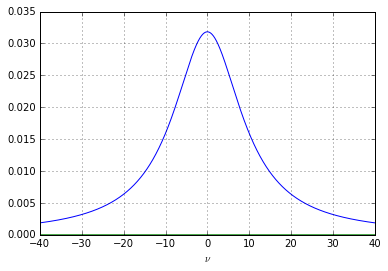

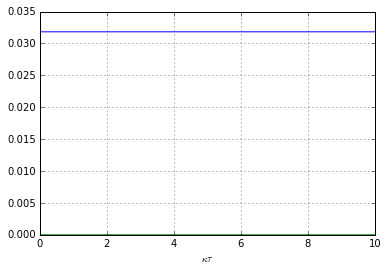

In [121]:
f1=lambda nu : f(nu,0);
figure(1)
nu = linspace(-40*2*pi,40*2*pi,10000)
plot(nu/2/pi,f1(nu).real,nu/2/pi,f1(nu).imag)
grid(True)
xlabel("$\\nu$")
f2=lambda ktau : f(0,ktau) 
figure(2)
ktau = linspace(0,10,10000)
plot(ktau,f2(ktau).real,ktau,f2(ktau).imag)
grid(True)
xlabel("$\kappa\\tau$")
show()

(0.0105494623834+0j)
(0.00591473256152-2.26827163991e-06j)
(0.00591473256152+2.26827163995e-06j)


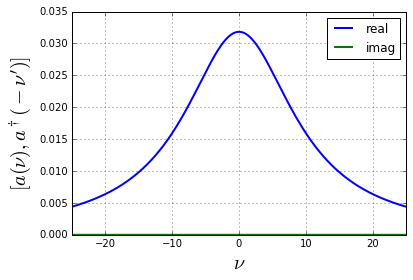

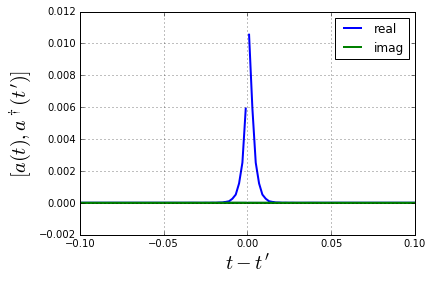

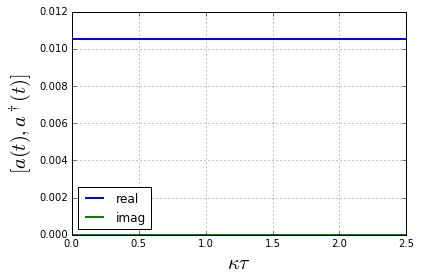

In [133]:
from functools import partial
from scipy.fftpack import fft
import numpy as np

N = 8192
nu = linspace(-40*pi*2,40*pi*2,N,endpoint=True)
f0 = f1(0)
fourier = f(nu,0)
figure(1)
plot(nu/2./pi,fourier.real,label="real",linewidth = 2.0)
hold(True)
plot(nu/2./pi,fourier.imag,label="imag",linewidth = 2.0)
legend(loc='best')
xlabel('$\\nu$', fontsize = 20)
ylabel('$[a(\\nu),a^\dagger(-\\nu^\prime)]$', fontsize = 20)
grid(True)
xlim(-25,25)
hold(False)

figure(2)
fourier = ifftshift(fourier)
time = ifft(fourier)
#time=ifftshift(time)
time0 = ifft(f(nu,0))
print(time[0])
print(time[1])
print(time[N-1])
space = (-2*nu[0])/N
t=linspace(-1/2/space,1/2/space,N,endpoint=True)
t = ifftshift(t)
#print(space)
#print(time[0])
#print(time[1])
#print(t[0])
#print(t[1])
plot(t,(time).real,label="real",linewidth = 2.0)
hold(True)
plot(t, (time).imag,label="imag",linewidth = 2.0)
#plot(t, time0.real,label="$\kappa\\tau=0$",linewidth = 2.0)
legend(loc='best')
xlabel('$t-t^\prime$', fontsize = 20)
ylabel('$[a(t),a^\dagger(t^\prime)]$', fontsize = 20)
xlim(-0.1,.1)
grid(True)
hold(False)

figure(3)
Ni = 1000
ktau = zeros(Ni)
ddep = zeros(Ni,dtype=complex)
for i in range(Ni):
    ktau[i] = 0.0025*(i)
    four    = f(nu,ktau[i])
    timd    = ifft(four)
    ddep[i] = timd[0]
plot(ktau,(ddep).real,label='real',linewidth = 2.0)
hold(True)
plot(ktau,(ddep).imag,label='imag',linewidth = 2.0)
legend(loc='best')
xlabel('$\kappa\\tau$', fontsize = 20)
ylabel('$[a(t),a^\dagger(t)]$', fontsize = 20)
grid(True)
#ylim(-.4,1)
hold(False)
show()

/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:383: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


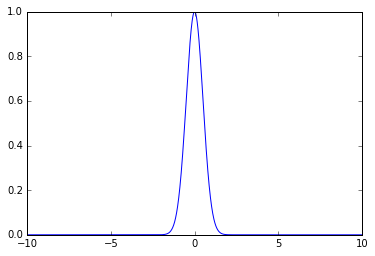

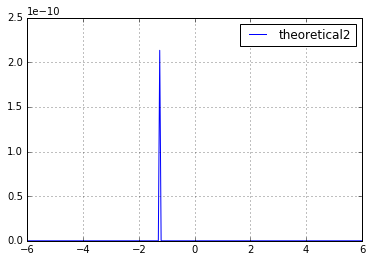

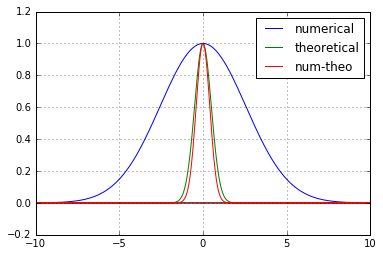

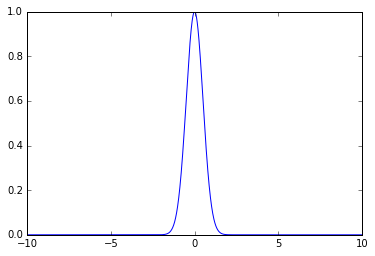

In [193]:
Nt= 2048
t = linspace(-10,10,Nt,endpoint=False)
a = 2
def func(a,t):
    return exp(-a*t**2)
figure(1)
plt.plot(t,func(a,t))

fourfunc = fft(func(a,t))
sp = t[2]-t[1]
freq = fftfreq(Nt,sp)
fourfunc2 = abs(fftshift(fourfunc))
freq2 = fftshift(freq)
figure(2)
theo = sqrt(pi/a)*exp(-freq2**2/4./a)
const=fourfunc2[Nt/2]/theo[Nt/2]
def funcfour(a,om,t):
    return exp(1j*om*t)*exp(-a*t**2)

res = zeros(Nt)
for tl in range(Nt):
    integrable = lambda ti: funcfour(a,freq[i],ti)
    res[i],err=integrate.quad(integrable,-infty,infty)
    
#plt.plot(freq2,fourfunc2,label="numerical")
#hold(True)
#plt.plot(freq2,theo,label="theoretical")
plt.plot(freq2,abs(res),label="theoretical2")
grid(True)
legend(loc="best")
xlim(-6,6)

spf = abs(freq[10]-freq[9])
invt    = linspace(-Nt/2.*spf,Nt/2.*spf,Nt,endpoint=False)
invt2  = ifftshift(invt)
invfunc = ifft(fourfunc)
invfunc2 = ifft(ifftshift(theo))
invfunc = ifftshift(invfunc)
figure(3)
invtheo = exp(-a*invt2**2)
plt.plot(invt2,invfunc,label="numerical")
hold(True)
plt.plot(invt2,invtheo,label="theoretical")
plt.plot(invt2,const/2/pi*invfunc2,label="num-theo")
grid(True)
legend(loc="best")
xlim(-10,10)

figure(4)
plt.plot(t,abs(integrable(t)))
